# Final Project
## Kelsea Figaro
### December 2025

## The purpose of this project is to look into the population of wolves in Denali Nation Park located in Alaska

### Questions to be Answered:
### 1) Has there been an increase or decrease in wolf counts over the course of the years?
### 2) Is there a correlation between the number of wolf packs monitored and the area?
### 3) What year had the highest number of packs monitored in the spring? How about fall?
### 4) What is the most common distribution of wolf counts in the spring, is there a difference in the fall?


### Import Required Packages and the dataset

In [2]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

## Import the data required

In [3]:
wolf=pd.read_csv('WolfClean.csv')

### Question 1: Has there been an increase or decrease in wolf counts over the course of the years?

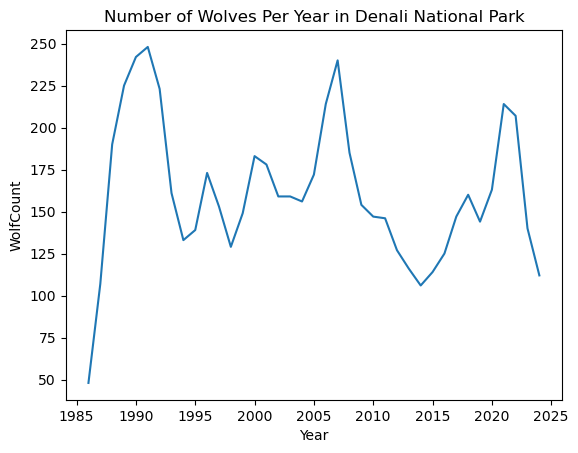

In [4]:
sns.lineplot(x='Year',y='WolfCount',data=wolf).set(title='Number of Wolves Per Year in Denali National Park')
plt.savefig("wolvesperyear.svg", format="svg")

### Analysis: It appears that the wolf populations in Denali have flucated over the years. There is not a set increase or decrease. There was a large population growth between 1986 to 1991. Then over the years there was a a up and down trend and then since 2021 there has been a downward trend.

## Question 2: Is there a correlation between the number of wolf packs monitored in the spring and the area? What about the Fall?

In [5]:
# I had to remove all commas in both the spring and fall area columns as I was getting a error.
#Then I had to change the data type in the spring and fall area columns from object to int64 as I was getting a type error
wolf['AreaSqrKMSpring'] = wolf['AreaSqrKMSpring'].str.replace(',', '')
wolf['AreaSqrKMFall'] = wolf['AreaSqrKMFall'].str.replace(',', '')
wolf['AreaSqrKMSpring'] = wolf['AreaSqrKMSpring'].astype('int64')
wolf['AreaSqrKMFall'] = wolf['AreaSqrKMFall'].astype('int64')

In [6]:
#Renamed columns to be clearer to the viewer
wolf2 = wolf.rename(columns={
    'PacksSpring': 'Number of Packs in Spring',
    'PacksFall': 'Number of Packs in Fall',
    'AreaSqrKMSpring': 'Area Observed in Spring(km²)',
    'AreaSqrKMFall': 'Area Observed in Fall(km²)'
})

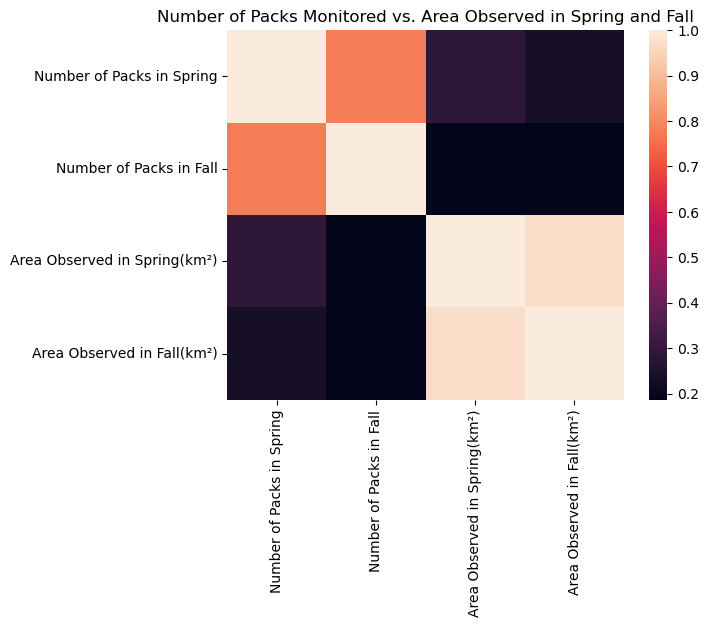

In [7]:
sns.heatmap(wolf2[['Number of Packs in Spring', 'Number of Packs in Fall','Area Observed in Spring(km²)' ,'Area Observed in Fall(km²)']].corr())  
plt.title('Number of Packs Monitored vs. Area Observed in Spring and Fall')
plt.savefig("coorheatmap.svg", format="svg")

## Analysis: Looking at this heatmap, neither spring nor fall have strong correlation, however, it appears spring has slightly stronger correlation between the number of packs and the area monitored then the fall

## Question 3: What year had the highest number of packs monitored in the spring? How about fall?

### I did use chatgpt for this but I cannot recall what my prompt was and I cannot seem to republicate it to get this exact code

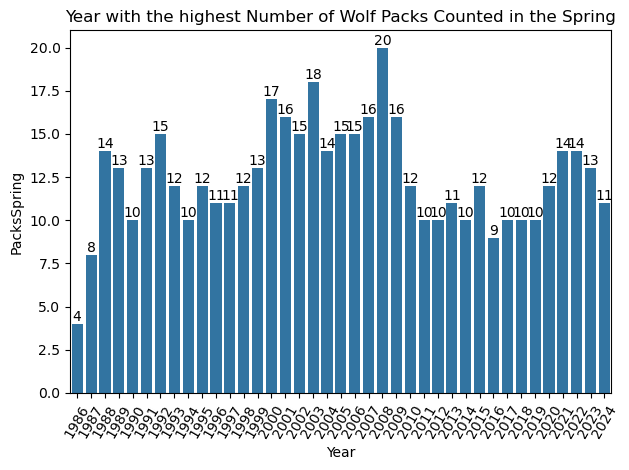

<Figure size 640x480 with 0 Axes>

In [8]:
ax = sns.barplot(x='Year', y='PacksSpring', data=wolf)

# Rotate x-axis labels
plt.xticks(rotation=60)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')   # remove decimals if values are integers
plt.title('Year with the highest Number of Wolf Packs Counted in the Spring')
plt.tight_layout()
plt.show()
plt.savefig("wolfpackspring.svg", format="svg")

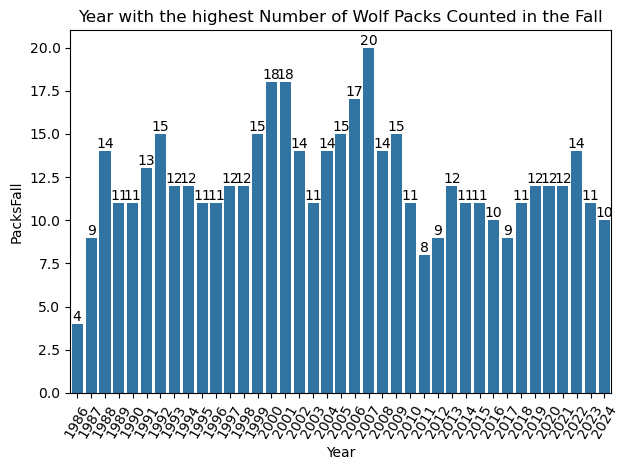

<Figure size 640x480 with 0 Axes>

In [9]:
ax = sns.barplot(x='Year', y='PacksFall', data=wolf)

# Rotate x-axis labels
plt.xticks(rotation=60)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')   # remove decimals if values are integers
plt.title('Year with the highest Number of Wolf Packs Counted in the Fall')
plt.tight_layout()
plt.show()
plt.savefig("wolfpackfall.svg", format="svg")

### Analysis: It appears that 2008 had the highest spring count and 2007 had the highest fall count. 

## Question 4: What is the most common distribution of wolf counts in the spring, is there a difference in the fall?

### I wrote the histogram code on my own, however I used chatgpt to figure out how to make the bins match up with the x axis tick marks
### I had 3 prompts to get this result
### 1) how to make x axis on seaborn histogram have the bins line up with the x-axis
### 2) add to my histogram sns.histplot(x='WolfCountFall', data=wolf,stat='count', bins=10,color='darkslategrey')
### 3) have each bin be in steps of 10 from 0 to 150
### I did it with the fall count first and then applied it to the spring count

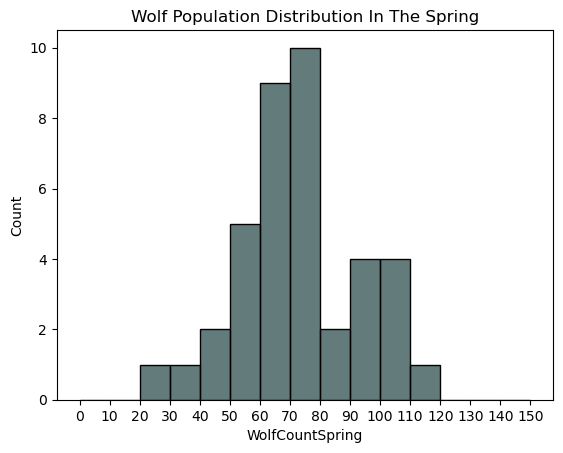

In [10]:
bin_edges = range(0, 151, 10)
sns.histplot(x='WolfCountSpring', data=wolf,stat='count', bins=bin_edges,color='darkslategrey')
plt.xticks(bin_edges)
plt.title('Wolf Population Distribution In The Spring')
plt.savefig("wolfdisspring.svg", format="svg")

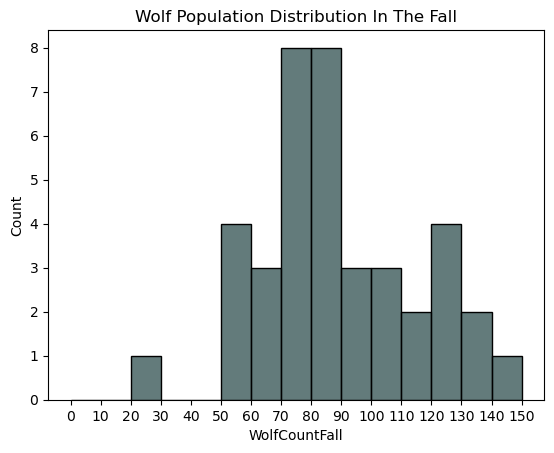

In [11]:
bin_edges = range(0, 151, 10)
sns.histplot(x='WolfCountFall', data=wolf,stat='count', bins=bin_edges,color='darkslategrey')
plt.xticks(bin_edges)
plt.title('Wolf Population Distribution In The Fall')
plt.savefig("wolfdisfall.svg", format="svg")

## Analysis: Spring had highest amount of years in the 70-80 range. While fall had the highest counts in the 70-80 and 80-90 range. So they seem to be similar, but it appears that the fall had a few years with a higher amount of wolves. 